In [1]:
import pandas as pd


In [2]:
colors = pd.Series(["red","blue","green"],index=["a","b","c"])
colors

a      red
b     blue
c    green
dtype: object

In [4]:
url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv"
car_sales = pd.read_csv(url)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [5]:
type(car_sales)

pandas.core.frame.DataFrame

In [6]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [7]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [15]:
car_sales.index =  [x for x in range(1,20,2)]

In [9]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [16]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 480.0+ bytes


In [17]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
1,Toyota,White,150043,4,"$4,000.00"
3,Honda,Red,87899,4,"$5,000.00"
5,Toyota,Blue,32549,3,"$7,000.00"
7,BMW,Black,11179,5,"$22,000.00"
9,Nissan,White,213095,4,"$3,500.00"
11,Toyota,Green,99213,4,"$4,500.00"
13,Honda,Blue,45698,4,"$7,500.00"
15,Honda,Blue,54738,4,"$7,000.00"
17,Toyota,White,60000,4,"$6,250.00"
19,Nissan,White,31600,4,"$9,700.00"


In [18]:
# iloc refers to position
# loc refers to index

car_sales.iloc[1]

Make                 Honda
Colour                 Red
Odometer (KM)        87899
Doors                    4
Price            $5,000.00
Name: 3, dtype: object

In [19]:
car_sales.loc[1]

Make                Toyota
Colour               White
Odometer (KM)       150043
Doors                    4
Price            $4,000.00
Name: 1, dtype: object

In [21]:
car_prices = car_sales.Price
df = pd.DataFrame(data=car_prices, index=[x for x in range(1,20,2)])
df

,Price
1,"$4,000.00"
3,"$5,000.00"
5,"$7,000.00"
7,"$22,000.00"
9,"$3,500.00"
11,"$4,500.00"
13,"$7,500.00"
15,"$7,000.00"
17,"$6,250.00"
19,"$9,700.00"


In [22]:
pd.crosstab(car_sales.Make, car_sales.Doors)

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [23]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
1,Toyota,White,150043,4,"$4,000.00"
3,Honda,Red,87899,4,"$5,000.00"
5,Toyota,Blue,32549,3,"$7,000.00"
7,BMW,Black,11179,5,"$22,000.00"
9,Nissan,White,213095,4,"$3,500.00"
11,Toyota,Green,99213,4,"$4,500.00"
13,Honda,Blue,45698,4,"$7,500.00"
15,Honda,Blue,54738,4,"$7,000.00"
17,Toyota,White,60000,4,"$6,250.00"
19,Nissan,White,31600,4,"$9,700.00"


In [25]:
car_sales.groupby(["Make"]).mean(numeric_only=True)

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<Axes: ylabel='Frequency'>

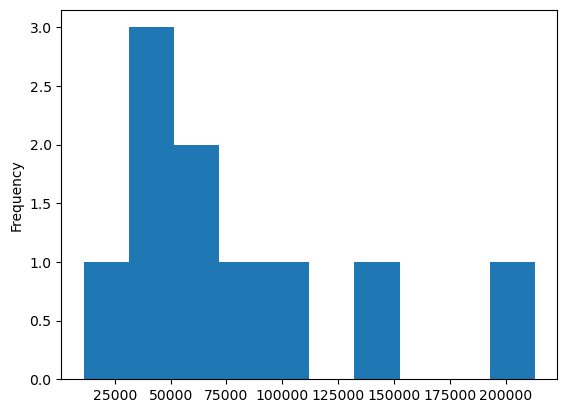

In [27]:
car_sales["Odometer (KM)"].plot(kind="hist")

<Axes: >

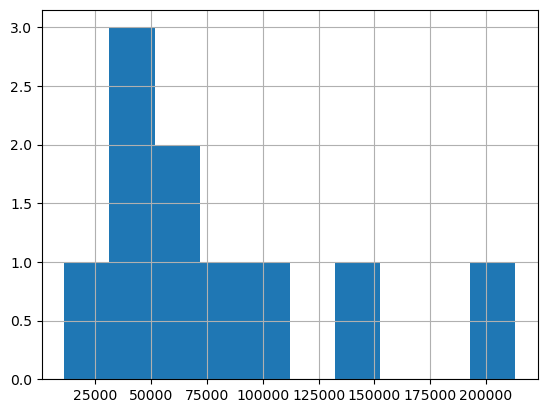

In [28]:
car_sales["Odometer (KM)"].hist()

In [29]:
# Ensure all values in the 'Price' column are strings
car_sales["Price"] = car_sales["Price"].astype(str)
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]","",regex=True).astype(int)

In [30]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
1,Toyota,White,150043,4,400000
3,Honda,Red,87899,4,500000
5,Toyota,Blue,32549,3,700000
7,BMW,Black,11179,5,2200000
9,Nissan,White,213095,4,350000
11,Toyota,Green,99213,4,450000
13,Honda,Blue,45698,4,750000
15,Honda,Blue,54738,4,700000
17,Toyota,White,60000,4,625000
19,Nissan,White,31600,4,970000


<Axes: ylabel='Frequency'>

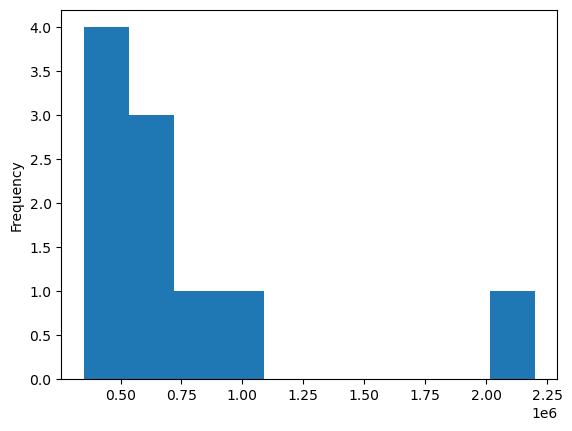

In [31]:
car_sales.Price.plot(kind="hist")

In [ ]:
def remove_last_two_zeros(number):
    """
    Removes the last two zeros from an integer.
    
    Parameters:
    number (int): The integer from which to remove the last two zeros.
    
    Returns:
    int: The integer with the last two zeros removed.
    """
    return number // 100
car_sales.Price = car_sales.Price.apply(remove_last_two_zeros)

In [32]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
1,Toyota,White,150043,4,400000
3,Honda,Red,87899,4,500000
5,Toyota,Blue,32549,3,700000
7,BMW,Black,11179,5,2200000
9,Nissan,White,213095,4,350000
11,Toyota,Green,99213,4,450000
13,Honda,Blue,45698,4,750000
15,Honda,Blue,54738,4,700000
17,Toyota,White,60000,4,625000
19,Nissan,White,31600,4,970000


<Axes: >

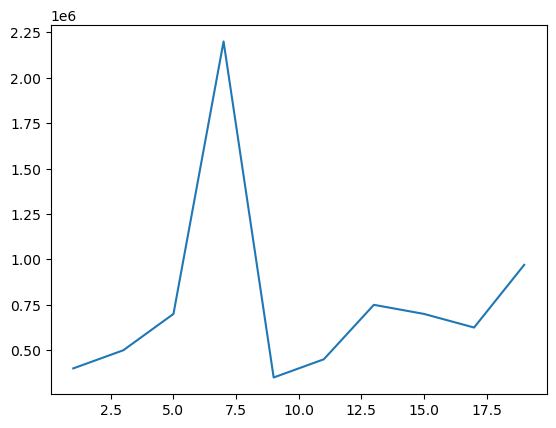

In [33]:
car_sales.Price.plot()

In [34]:
car_sales.sample(frac=1)

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Blue,32549,3,700000
13,Honda,Blue,45698,4,750000
19,Nissan,White,31600,4,970000
15,Honda,Blue,54738,4,700000
7,BMW,Black,11179,5,2200000
11,Toyota,Green,99213,4,450000
17,Toyota,White,60000,4,625000
9,Nissan,White,213095,4,350000
3,Honda,Red,87899,4,500000
1,Toyota,White,150043,4,400000


In [ ]:
care_sales = car_sales["Odometer (KM)"].apply(lambda x: x/1.6)
car_sales

In [ ]:
car_sales.head()

In [ ]:
car_sales["Make"] = car_sales.Make.map({
    "Toyota": "T","Honda": "H", "Nissan": "N","BMW":"BMW",})

In [ ]:
car_sales